In [1]:
import csv
import numpy as np
import pandas as pd
import glob
import pickle
from pylab import *

In [2]:
%matplotlib inline

In [23]:
pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

path = ["/home/petr/datainc/2013", "/home/petr/datainc/2014", "/home/petr/datainc/data_2015",
  "/home/petr/datainc/data_Q1_2016", "/home/petr/datainc/data_Q2_2016",
  "/home/petr/datainc/data_Q3_2016", "/home/petr/datainc/data_Q4_2016",
  "/home/petr/datainc/data_Q1_2017", "/home/petr/datainc/data_Q2_2017"]
#path = ["/home/petr/datainc/2013"]
allFiles = []
for path_ in path:
  allFiles += glob.glob(path_ + "/*.csv")

allFiles.sort()


In [24]:
models_hist = {}

#count = 0
for file_ in allFiles:
  df = pd.read_csv(file_, index_col=None, header=0, usecols=['model','failure','smart_9_raw'])
  df = df[df["failure"]==1]
  if (len(df) > 0):
    for m, h in zip(df['model'], df['smart_9_raw']):
      if not m in models_hist:
        models_hist[m] = [h]
      else:
        models_hist[m] += [h]

pickle_out = open("model_hist.pickle","wb")
pickle.dump(models_hist, pickle_out)
pickle_out.close()


In [20]:
pickle_in = open("model_hist.pickle","rb")
models_hist = pickle.load(pickle_in)

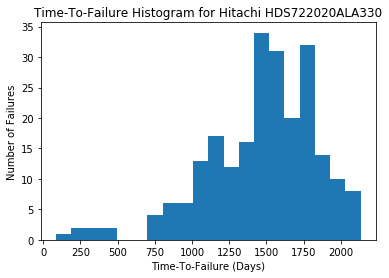

In [21]:
model = 'Hitachi HDS722020ALA330'
plt.xlabel("Time-To-Failure (Days)")
plt.ylabel("Number of Failures")
plt.title("Time-To-Failure Histogram for " + model)
plt.hist([x/24 for x in models_hist[model]], bins=20)
plt.show()